# Bayesian Networks: Alarm Example

A [GraViz installation](https://graphviz.org/download/) is needed to view the graphic outputs in this notebook

In [1]:
import numpy as np
import pandas as pd
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import util.extensions

%matplotlib inline 

> Alarm Example from (Pearl, 1988):<br><br>
> In Los Angeles, burglary and earthquakes are common.<br>They both can trigger an alarm. 
> In case of alarm, two neighbors John and Mary may call me.

In [2]:
net_name = 'Alarm Example'
bn = gum.BayesNet(net_name)

## Define Random Variables

In [3]:
B = bn.add(gum.LabelizedVariable('B','B', 2))
E = bn.add(gum.LabelizedVariable('E','E', 2))
A = bn.add(gum.LabelizedVariable('A','A', 2))
J = bn.add(gum.LabelizedVariable('J','J', 2))
M = bn.add(gum.LabelizedVariable('M','M', 2))

In [4]:
# Alarm (A) is conditional on Burglary (B)
bn.addArc(B, A)

# Alarm (A) is conditional on Earthquake (E)
bn.addArc(E, A)

# John calls (J) is conditional on Alarm (A)
bn.addArc(A, J)

# Mary calls (M) is conditional on Alarm (A)
bn.addArc(A, M)

## Define Probability Distribution for each Node

In [5]:
bn.cpt(B).fillWith([0.99, 0.01])
bn.cpt(B)

(gum::Potential<double>@0x7f817703c850) <B:0> :: 0.99 /<B:1> :: 0.01

In [6]:
bn.cpt(E).fillWith([0.98, 0.02])
bn.cpt(E)

(gum::Potential<double>@0x7f8177996040) <E:0> :: 0.98 /<E:1> :: 0.02

In [7]:
bn.cpt(A)[{'B': 1, 'E': 1}] = [0.05, 0.95]
bn.cpt(A)[{'B': 1, 'E': 0}] = [0.06, 0.94]
bn.cpt(A)[{'B': 0, 'E': 1}] = [0.71, 0.29]
bn.cpt(A)[{'B': 0, 'E': 0}] = [0.999, 0.001]
bn.cpt(A)

(gum::Potential<double>@0x7f81779b8070) <A:0|B:0|E:0> :: 0.999 /<A:1|B:0|E:0> :: 0.001 /<A:0|B:1|E:0> :: 0.06 /<A:1|B:1|E:0> :: 0.94 /<A:0|B:0|E:1> :: 0.71 /<A:1|B:0|E:1> :: 0.29 /<A:0|B:1|E:1> :: 0.05 /<A:1|B:1|E:1> :: 0.95

In [8]:
bn.cpt(M)[{'A': 1}] = [0.1, 0.9]
bn.cpt(M)[{'A': 0}] = [0.95, 0.05]
bn.cpt(M)

(gum::Potential<double>@0x7f81779d8890) <M:0|A:0> :: 0.95 /<M:1|A:0> :: 0.05 /<M:0|A:1> :: 0.1 /<M:1|A:1> :: 0.9

In [9]:
bn.cpt(J)[{'A': 1}] = [0.3, 0.7]
bn.cpt(J)[{'A': 0}] = [0.99, 0.01]
bn.cpt(J)

(gum::Potential<double>@0x7f81779a65c0) <J:0|A:0> :: 0.99 /<J:1|A:0> :: 0.01 /<J:0|A:1> :: 0.3 /<J:1|A:1> :: 0.7

## Display Bayesian Network

In [10]:
print(bn)

BN{nodes: 5, arcs: 4, domainSize: 32, dim: 20}


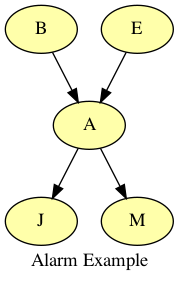

In [11]:
bn.display()

## Inference

In [12]:
# Enables exact inference
ie = gum.LazyPropagation(bn)

### 1/ Global Probability Distribution

It follows from the Bayesian network structure that

$p(A, B, E, J, M) = p(M|A) \cdot p(J|A) \cdot p(A|E,B) \cdot p(E) \cdot p(B)$

Note, calculating the global distribution takes exponential time and space - do not do this for larger examples!

In [13]:
target = {B, E, A, J, M}
ie.addJointTarget(target)

ie.makeInference()
glob = ie.jointPosterior(target)

glob

(gum::Potential<double>@0x7f8178774030) <A:0|J:0|M:0|B:0|E:0> :: 0.911561 /<A:1|J:0|M:0|B:0|E:0> :: 2.9106e-05 /<A:0|J:1|M:0|B:0|E:0> :: 0.00920768 /<A:1|J:1|M:0|B:0|E:0> :: 6.7914e-05 /<A:0|J:0|M:1|B:0|E:0> :: 0.0479769 /<A:1|J:0|M:1|B:0|E:0> :: 0.000261954 /<A:0|J:1|M:1|B:0|E:0> :: 0.000484615 /<A:1|J:1|M:1|B:0|E:0> :: 0.000611226 /<A:0|J:0|M:0|B:1|E:0> :: 0.000553014 /<A:1|J:0|M:0|B:1|E:0> :: 0.00027636 /<A:0|J:1|M:0|B:1|E:0> :: 5.586e-06 /<A:1|J:1|M:0|B:1|E:0> :: 0.00064484 /<A:0|J:0|M:1|B:1|E:0> :: 2.9106e-05 /<A:1|J:0|M:1|B:1|E:0> :: 0.00248724 /<A:0|J:1|M:1|B:1|E:0> :: 2.94e-07 /<A:1|J:1|M:1|B:1|E:0> :: 0.00580356 /<A:0|J:0|M:0|B:0|E:1> :: 0.0132215 /<A:1|J:0|M:0|B:0|E:1> :: 0.00017226 /<A:0|J:1|M:0|B:0|E:1> :: 0.000133551 /<A:1|J:1|M:0|B:0|E:1> :: 0.00040194 /<A:0|J:0|M:1|B:0|E:1> :: 0.000695871 /<A:1|J:0|M:1|B:0|E:1> :: 0.00155034 /<A:0|J:1|M:1|B:0|E:1> :: 7.029e-06 /<A:1|J:1|M:1|B:0|E:1> :: 0.00361746 /<A:0|J:0|M:0|B:1|E:1> :: 9.405e-06 /<A:1|J:0|M:0|B:1|E:1> :: 5.7e-06 /<A:0|J:1|M:0|B:1|E:1> :: 9.5e-08 /<A:1|J:1|M:0|B:1|E:1> :: 1.33e-05 /<A:0|J:0|M:1|B:1|E:1> :: 4.95e-07 /<A:1|J:0|M:1|B:1|E:1> :: 5.13e-05 /<A:0|J:1|M:1|B:1|E:1> :: 5e-09 /<A:1|J:1|M:1|B:1|E:1> :: 0.0001197

We can extract specific values such as $p(B = 1, E = 0, A = 1, J = 0, M = 1)$

In [14]:
ind = gum.Instantiation(glob)
ind['B'] = 1
ind['E'] = 0
ind['A'] = 1
ind['J'] = 0
ind['M'] = 1

print('Value at position {} is {:.4f}'.format(ind, glob.get(ind)))

Value at position <A:1|J:0|M:1|B:1|E:0> is 0.0025


### 2/ Marginal Distribution

Calculate $p(E) = \sum_{A, B, J, M} p(A, B, E, J, M)$

In [15]:
target = E
ie.addTarget(target)
ie.makeInference()
ie.posterior(target)

(gum::Potential<double>@0x7f8170b54bd0) <E:0> :: 0.98 /<E:1> :: 0.02

### 3/ Conditional Distribution

Calculate the probability of burglary given John calls but Mary does not:

$p(B = 1 | J = 1, M = 0) = 
\frac{p(B = 1, J = 1, M = 0)}{p(J = 1, M = 0)} =
\frac{\sum_{A,E} p(B = 1, J = 1, M = 0, A, E)}{\sum_{A,B,E} p(J = 1, M = 0, A, B, E)}$

In [16]:
target = B
ie.addTarget(target)
ie.setEvidence({'J' : 1, 'M' : 0})
ie.makeInference()
ie.posterior(target)

(gum::Potential<double>@0x7f8170b6e020) <B:0> :: 0.936628 /<B:1> :: 0.0633725

Let us verify this result by hand: It follows from the Bayesian network structure that

$p(B = 1 | J = 1, M = 0) = 
\frac{p(B = 1, J = 1, M = 0)}{p(J = 1, M = 0)} =
\frac{\sum_{A,E} p(B = 1, J = 1, M = 0, A, E)}{\sum_{A,B,E} p(J = 1, M = 0, A, B, E)} =
\frac{\sum_{A,E} p(M=0|A) \cdot p(J=1|A) \cdot p(A|E,B=1) \cdot p(E) \cdot p(B=1) }{\sum_{A,B,E} p(M = 0 |A) \cdot p(J = 1|A) \cdot p(A|E,B) \cdot p(E) \cdot p(B)}$

In [17]:
numerator = (
0.10 * 0.70 * 0.95 * 0.02 * 0.01 +
0.95 * 0.01 * 0.05 * 0.02 * 0.01 +
0.10 * 0.70 * 0.94 * 0.98 * 0.01 +
0.95 * 0.01 * 0.06 * 0.98 * 0.01)
print("numerator:\t {:.6f}".format(numerator))

denominator = (
0.10 * 0.70 * 0.95  * 0.02 * 0.01 +
0.95 * 0.01 * 0.05  * 0.02 * 0.01 +
0.10 * 0.70 * 0.94  * 0.98 * 0.01 +
0.95 * 0.01 * 0.06  * 0.98 * 0.01 +
0.10 * 0.70 * 0.29  * 0.02 * 0.99 +
0.95 * 0.01 * 0.71  * 0.02 * 0.99 +
0.10 * 0.70 * 0.001 * 0.98 * 0.99 +
0.95 * 0.01 * 0.999 * 0.98 * 0.99)
print("denominator:\t {:.6f}".format(denominator))

result = numerator / denominator

# Compare visually
print("result:\t\t {:.6f}".format(result))

# Compare automatically
assert np.isclose(result, ie.posterior(B)[1])

numerator:	 0.000664
denominator:	 0.010475
result:		 0.063372


We can display the effect of J = 1 and M = 0 on all variables (not only B).

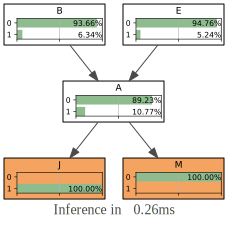

In [18]:
gnb.showInference(bn, evs={'J' : 1, 'M' : 0})

Finally, we could calculate the distribution $p(B|J, M)$ and look up the conditional we are interested in

$p(B|J, M) = \frac{p(B, J, M)}{p(J, M)}$

In [19]:
ie.eraseAllEvidence()

ie.addJointTarget({J, M})
ie.addJointTarget({B, J, M})
ie.makeInference()

numinator   = ie.jointPosterior({B, J, M})
denuminator = ie.jointPosterior({J, M})

numinator / denuminator

(gum::Potential<double>@0x7f816e491770) <J:0|M:0|B:0> :: 0.999088 /<J:1|M:0|B:0> :: 0.936628 /<J:0|M:1|B:0> :: 0.951593 /<J:1|M:1|B:0> :: 0.443478 /<J:0|M:0|B:1> :: 0.000912134 /<J:1|M:0|B:1> :: 0.0633725 /<J:0|M:1|B:1> :: 0.0484069 /<J:1|M:1|B:1> :: 0.556522